Ноутбук в колаб: https://colab.research.google.com/drive/1WXc7QEAl753HzDnLeqvEu6WIyTxkaNPe?usp=sharing

In [49]:
# библиотека для генерации случаных чисел
import random
# тут лежат некоторые математические функции
import math

# для работы с таблицами: DataFrame, Series
import pandas as pd
# для работы с массивами и матрицами чисел, некоторые статистические функции
import numpy as np
# тут лежат функции распределения случайных величин
from scipy import stats

# БЛОК ДЛИ РИСОВАНИЯ ГРАФИКОВ
# основная библиотека для рисования
import matplotlib.pyplot as plt
# дизайн картинок
plt.style.use('seaborn')
# позволяем отрисовавать картинки сразу в ноутбуке
%matplotlib inline

# Теория Вероятностей

В той или иной форме машинное обучение сводится к прогнозированию. Возможно, мы захотим предсказать вероятность того, что у пациента случится сердечный приступ в следующем году, учитывая его историю болезни. 

При обнаружении аномалий мы могли бы захотеть оценить, насколько вероятным будет набор показаний реактивного двигателя самолета, если бы он работал нормально. 

Когда мы создаем рекомендательные системы, мы также должны думать о вероятности. Например, предположим гипотетически, что мы работали на крупного онлайн-продавца книг. Возможно, мы захотим оценить вероятность того, что конкретный пользователь купит конкретную книгу. Для этого нам нужно использовать язык вероятностей. Целые курсы, специальности, дипломные работы, карьеры и даже отделы посвящены вероятности. В этом занятии мы ознакомимся с основными понятиями теории вероятностей.

## Случайная величина

Центральным понятием является случайная величина:   
**Случайная величина** это переменная, значения которой представляет собой исходы какого-нибудь случайного феномена или эксперимента.


Например:
 - эксперимент: подбрасывание монетки (орел = 1, решка = 0)
 - результат эксперимента: исход
 - все возможные варианты исхода: значения случайной величины (1 или 0)
 
То есть, случайная величина $\eta$, которая может принимать значения из множества {0 , 1}

На самом деле, нам интересна не сколько сама случайная величина, а частота появления тех или иных значений - вероятность. Давайте с помощью питона подбросим монетку 100000 раз. И посчитаем частоту (вероятность) каждого исхода.

In [ ]:
random.seed(0) # используем этот метод для воспроизводимости результатов

# 100000 раз подкинем монетку и посмотрим, какие были исходы
# для этого используем randint, который возвращает целое число, из отрезка [0, 1]
lst = []
for i in range(100000):
    lst.append(random.randint(0, 1))
pd.DataFrame({'sv': lst}).sv.value_counts()

0    50192
1    49808
Name: sv, dtype: int64

Говорят, что 100000 исходов случайной величины, составляют **выборку** случайной величины объемом 100000.

Сумма вероятностей всех исходов равна **1**

Еще пример:

Скажем, что мы бросили кубик и хотим знать, какова вероятность увидеть цифру 1, а не другую цифру. 

Если центр масс кубика не смещен, все 6 результатов ${1,…, 6}$ с равной вероятностью произойдут, и, таким образом, мы увидим 1 в одном из шести случаев. Формально мы утверждаем, что 1 происходит с вероятностью $\frac{1}{6}$. Для реального кубика, который мы получаем от фабрики, мы можем не знать эти пропорции, и нам нужно проверить, не испорчен ли он. Единственный способ исследовать кубик - бросить его много раз и записать результаты. 

Для каждого броска  мы будем наблюдать значение из ${1,…, 6}$. Учитывая эти результаты, мы хотим исследовать вероятность наблюдения каждого результата. Один естественный подход к каждому значению состоит в том, чтобы взять индивидуальный счет для этого значения и разделить его на общее количество бросков. Это дает нам оценку вероятности данного события. 

Закон больших чисел говорит нам, что с ростом количества бросков эта оценка будет приближаться к истинной вероятности. Прежде чем вдаваться в детали того, что здесь происходит, давайте попробуем.

Для этого мы хотим иметь возможность бросить кубик. В статистике мы называем этот 
процесс семплированием - выбора примеров из выборки распределения вероятностей. Распределение, которое присваивает вероятности ряду дискретных выборов, называется мультиномиальным распределением. Позже мы дадим более формальное определение распределения, но на высоком уровне будем рассматривать его как просто присвоение вероятностей событиям.

Мы можем получить выборку из полиномиального распределения через np.random.multinomial. Функцию можно вызывать разными способами, но мы остановимся на самом простом. Чтобы нарисовать одну выборку, мы просто передаем вектор вероятностей. Выходные данные функции np.random.multinomial представляют собой еще один вектор такой же длины: его значение по индексу i является числом раз, когда результат выборки соответствует значению i.

In [ ]:
fair_probs = [1.0 / 6] * 6
print(fair_probs)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


In [ ]:
np.random.multinomial(2, fair_probs)

array([1, 0, 0, 0, 1, 0])

Если вы запускаете сэмплер несколько раз, вы обнаружите, что вы получаете случайные значения каждый раз. Как и при оценке справедливости матрицы, мы часто хотим получить много образцов из одного и того же распределения. Было бы невыносимо медленно делать это с циклом Python for, поэтому random.multinomial поддерживает рисование нескольких выборок одновременно, возвращая массив независимых выборок в любой форме, которую мы могли бы пожелать.

In [ ]:
np.random.multinomial(1000000, fair_probs)/1000000

array([0.165554, 0.166915, 0.167383, 0.166602, 0.166968, 0.166578])

Мы также можем провести, скажем, 3 группы экспериментов, где каждая группа отбирает 10 образцов одновременно.

In [ ]:
counts = np.random.multinomial(10, fair_probs, size=3)
counts

array([[3, 1, 3, 1, 2, 0],
       [3, 3, 1, 1, 2, 0],
       [1, 2, 2, 0, 3, 2]])

Мы можем посчитать, после каждого из 1000 бросков, сколько раз было брошено каждое число. В частности, мы рассчитываем относительную частоту как оценку истинной вероятности.

In [ ]:
1/6

0.16666666666666666

In [ ]:
counts = np.random.multinomial(1000, fair_probs).astype(np.float32)
counts / 1000

array([0.194, 0.186, 0.152, 0.163, 0.158, 0.147], dtype=float32)

Мы знаем, что каждый результат имеет истинную вероятность $\frac{1}{6}$, примерно 0.167, поэтому вышеприведенные оценки выходных данных выглядят хорошо.

Мы также можем визуализировать, как эти вероятности со временем сходятся к истинной вероятности. Давайте проведем 500 групп экспериментов, где каждая группа использует 10 сэмплов.

[[1 0 5 0 4 0]
 [3 2 2 1 1 1]
 [1 4 2 1 2 0]
 [4 1 1 1 2 1]
 [0 3 0 4 3 0]]
[[1.000e+00 0.000e+00 5.000e+00 0.000e+00 4.000e+00 0.000e+00]
 [4.000e+00 2.000e+00 7.000e+00 1.000e+00 5.000e+00 1.000e+00]
 [5.000e+00 6.000e+00 9.000e+00 2.000e+00 7.000e+00 1.000e+00]
 ...
 [1.625e+03 1.701e+03 1.683e+03 1.597e+03 1.677e+03 1.697e+03]
 [1.625e+03 1.704e+03 1.684e+03 1.601e+03 1.678e+03 1.698e+03]
 [1.627e+03 1.705e+03 1.686e+03 1.604e+03 1.680e+03 1.698e+03]]


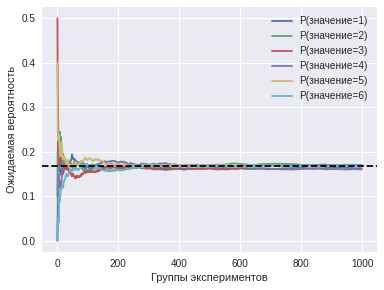

In [ ]:
counts = np.random.multinomial(10, fair_probs, size=1000)
print(counts[:5])
cum_counts = counts.astype(np.float32).cumsum(axis=0)
print(cum_counts)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

plt.figure(figsize=(6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i],
                 label=("P(значение=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Группы экспериментов')
plt.gca().set_ylabel('Ожидаемая вероятность')
plt.legend()

### Аксиомы теории вероятностей

Имея дело с бросками кубика, мы называем набор $S = {1,2,3,4,5,6}$ пространством выходов (событий, пространство сэмплов), где каждый элемент является результатом. Событие - это набор результатов из данного выборочного пространства. Например, наблюдение 5 и «видение нечетного числа» ({1,3,5}) являются результатом события броска кубика. Обратите внимание, что если результатом случайного эксперимента является событие A (говорят, что произошло событие A). 

Формально вероятность можно представить как функцию, которая отображает множество в реальное значение. Вероятность события $A$ в данном выборочном пространстве $S$, обозначаемом как $P(A)$, удовлетворяет следующим свойствам: 

* Для любого события $A$ его вероятность никогда не бывает отрицательной, то есть $P (A) ≥ 0$
* Вероятность всего выборочного пространства равна 1, т.е. $P(S) = 1$
* Для любой исчисляемой последовательности событий $A1, A2, \dots$, которые являются взаимоисключающими $Ai∩Aj = ∅$ для всех $i ≠ j$, вероятность того, что произойдет, равна сумме их индивидуальных вероятностей, т. е. $P (⋃^∞ _{i=1} = Ai) = ∑^∞_{i=1} P (Ai)$. (для наших приложений достаточно рассмотреть конечный случай, т.е. $\inf$ заменить на $m \le 2^{n}$, где $n$ это количество различных индивидуальных исходов).

Это также аксиомы теории вероятностей, предложенные Колмогоровым в 1933 году. Благодаря этой системе аксиом мы можем избежать любого философского спора о случайности. Вместо этого мы можем строго рассуждать с математическим языком. Например, если событие $A_1$ будет всем пространством выходов и $Ai = ∅$ для всех $i> 1$, мы можем доказать, что $P(∅) = 0$ т.е. вероятность невозможного события 0.

### Типы случайных величин

В нашем случайном эксперименте по бросанию кубика мы ввели понятие случайной величины. Случайная величина может быть практически любой величиной и не является детерминированной. Она может принять одно значение среди множества возможностей в случайном эксперименте.

 Рассмотрим случайную величину X, значение которой находится в вероятностном пространстве $S = {1,2,3,4,5,6}$ подбрасывания кубика. Мы можем обозначить событие «выпадения 5» как ${X = 5}$ или $X = 5$, а его вероятность - как $P({X = 5})$ или $P(X = 5)$. Посредством $P (X = a)$ мы делаем различие между случайной величиной $X$ и значениями (например, a), которые может принимать $X$.

Для компактных обозначений, с одной стороны, мы можем просто обозначить $P (X)$ как распределение по случайной переменной $X$: распределение говорит нам о вероятности того, что $X$ принимает любое значение. С другой стороны, мы можем просто написать $P_{X} (a)$, чтобы обозначить вероятность того, что случайная величина принимает значение $a$. Поскольку событие в теории вероятностей представляет собой набор результатов из пространства выходов, мы можем указать диапазон значений для случайной величины, которую нужно принять. Например, $P(1≤X≤3)$ обозначает вероятность события ${1≤X≤3}$, что означает ${X = 1,2 или 3}$. Эквивалентно, $P(1≤X≤3)$ представляет вероятность того, что случайная величина $X$ может принять значение от ${1,2,3}$.

Обратите внимание, что существует тонкая разница между дискретными случайными событиями (такими как стороны кубика) и непрерывными (такими как, например, вес и рост человека). Нет смысла спрашивать, имеют ли два человека одинаковую высоту. Если мы проведем достаточно точные измерения, вы обнаружите, что нет двух людей на планете, имеющих одинаковую высоту. На самом деле, если мы проведем достаточно точное измерение, у вас не будет такой же высоты, когда вы просыпаетесь и когда ложитесь спать. Поэтому нет смысла спрашивать о вероятности того, что кто-то имеет рост 1,80139278291028719210196740527486202 метра. 

Учитывая мировое население людей, вероятность практически равна 0 (говорят вероятность-ноль). В этом случае имеет смысл спросить, попадает ли чей-то рост в определенный интервал, скажем, между 1,79 и 1,81 метра. В этих случаях мы количественно оцениваем вероятность того, что мы видим значение как плотность. Высота ровно 1,80 метра не имеет вероятности, кроме ненулевой плотности. В интервале между любыми двумя разными высотами мы имеем ненулевую вероятность. Далее мы рассмотрим вероятность в дискретном пространстве, к непрерывным перейдем позднее.

## Несколько случайных величин

Очень часто мы хотим рассматривать более одной случайной величины одновременно. Например, мы можем захотеть смоделировать связь между болезнями и симптомами. Учитывая заболевание и симптом, скажем, «грипп» и «кашель», они могут возникать или не возникать у пациента с некоторой вероятностью. Хотя мы надеемся, что вероятность того и другого будет близка к нулю, мы, возможно, захотим оценить эти вероятности и их взаимосвязь друг с другом, чтобы мы могли применить наши выводы для улучшения медицинской помощи.

В качестве более сложного примера изображения содержат миллионы пикселей, то есть миллионы случайных величин. И во многих случаях изображения будут сопровождаться меткой, идентифицирующей объекты на изображении. Мы также можем думать о метке как о случайной переменной. Мы можем даже рассматривать все метаданные как случайные переменные, такие как местоположение, время, апертура, фокусное расстояние, ISO, расстояние фокусировки и тип камеры. Все это случайные величины, встречаются совместно, т.е. реализуются совместно.

### Cовместная вероятность

Обозначим совместной вероятностью P (A = a, B = b). При любых значениях a и b совместная вероятность позволяет нам ответить, какова вероятность того, что A = a и B = b одновременно? Обратите внимание, что для любых значений a и b  $P (A = a, B = b) ≤P (A = a)$. Это должно быть так, поскольку для того, чтобы произошли $A = a$ и $B = b$, должно произойти $A = a$ и также должно произойти $B = b$ (и наоборот). Таким образом, $A = a$ и $B = b$ не могут быть более вероятными, чем $A = a$ или $B = b$ в отдельности.

### Условная вероятность

Это приводит нас к интересному соотношению: $0≤\frac{P(A=a,B=b)}{P(A=a)}≤1$ . Мы называем это отношение условной вероятностью и обозначаем его через $P (B=b∣A=a)$ : это вероятность $B=b$ , при условии, что $A=a$ произошло.

Вероятность совместного появления двух зависимых событий равна произведению вероятности одного из них на условную вероятность второго, вычисленную при условии, что первое событие произошло, т.е.

$P(AB) = P(B)P(A|B) = P(A)P(B|A)$

Откуда формула для условной вероятности:

$P(A|B) = \frac{P(AB)}{P(B)}$

Пример:

Бросают 2 игральные кости. Какова вероятность, что на первой кости выпало не более 2 очков, при условии, что сумма очков нечетная?

Обозначим
* А - сумма очнов нечетная
* B - на первой кости выпало не более 2 очков
* AB - сумма числа очков нечетная и на первой кости не выпало более 2 очков

Тогда по формуле искомая вероятность будет

$P(B|A) = \frac{P(AB)}{P(A)}$

Из 36 исходов 18 - нечетные, т.е. $P(A) = \frac{18}{36} = \frac{1}{2}$
Из 36 исходов не более и на первой не более 2 благоприятно 6 исходов. (это суммы 3, 5, 7 - комбинации (1, 2), (1, 4), (1, 6), (2, 1), (2, 3), (2, 5)). Тогда $P(AB) = \frac{6}{36} = \frac{1}{6}$

Тогда

$P(B|A) = \frac{P(AB)}{P(A)} = \frac{1/6}{1/2} = \frac{1}{3}$


### Полная вероятность

Если события $B_1, B_2, \dots, B_n$ попарно несовместимы* (т.е. $B_iB_j = ∅$ - невозможное событие при любых i, j), их сумма является достоверным событием, то:

$$P(A) = \sum_{k=1}^{n} P(A, B_k) = \sum_{k=1}^{n} P(B_k)P(A|B_k)$$

$P(A)$ называют формулой полной вероятности, при условии, что среди событий $B_1, B_2, \dots, B_n$ может наступить ровно одно и какое-нибудь из них обязательно наступит.

*В теории вероятностей несколько событий называются несовместными или несовместимыми, если никакие из них не могут появиться одновременно в результате однократного проведения эксперимента (опыта).

Формула полной вероятности позволяет вычислить вероятность интересующего события через условные вероятности этого события в предположении неких гипотез, а также вероятностей этих гипотез.

Еще пример:
 
В пирамиде 5 винтовок, три из которых снабжены оптическим прицелом. Вероятность того, что стрелок поразит мишень при выстреле из винтовки с оптическим прицелом, равна 0,95. Для винтовки без оптического прицела эта вероятность равна 0,7. Найти вероятность того, что мишень будет поражена, если стрелок производит один выстрел из наудачу взятой винтовки.

A - берем винтовку с оптическим прицелом
B - берем винтовку без оптического прицела

Тогда вероятности их взять будут $P(A) = \frac{3}{5}$, $P(B) = \frac{2}{5}$

C - стрелок поразил цель

Событие попадения по мишени со оптическим и без, по условию, $P(С|A) = 0.95$, $P(С|B) = 0.7$

Полная вероятность будет выражена как

$$P(C) = P(A)P(C|A) + P(B)P(C|B) = 0.6*0.95 + 0.4*0.7 = 0.57 + 0.28 = 0.85$$

### Теорма Байеса

**Теорема Байеса** - одна из основных теорем элементарной теории вероятностей, которая позволяет определить вероятность какого-либо события при условии, что произошло другое статистически взаимозависимое с ним событие. Другими словами, по формуле Байеса можно более точно пересчитать вероятность, взяв в расчёт как ранее известную информацию, так и данные новых наблюдений. 

Используя определение условных вероятностей, мы можем вывести одно из самых полезных и знаменитых уравнений в статистике: теорему Байеса.

 Это происходит следующим образом. По конструкции мы имеем правило умножения, что $P(A,B)=P(B∣ A)P(A)$. По симметрии это также справедливо для $P(A,B)=P(A∣B)P(B)$. Предположим, что $P(B)>0$ . Решая для одной из условных переменных мы получаем

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$



- P(A) - априорная вероятность гипотезы А
- P(B|A) - вероятность наступления гипотезы B при истинности гипотезы А
- P(B) - полная вероятность наступления события B

Хорошее объяснение из википедии:



> Формула Байеса позволяет «переставить причину и следствие»: по известному факту события вычислить вероятность того, что оно было вызвано данной причиной.
События, отражающие действие «причин», в данном случае называют гипотезами, так как они — предполагаемые события, повлёкшие данное. Безусловную вероятность справедливости гипотезы называют априорной (насколько вероятна причина вообще), а условную — с учётом факта произошедшего события — апостериорной (насколько вероятна причина оказалась с учётом данных о событии).



Пример:

Электролампы изготавливаются на трех заводах. 1-й завод производит 30% общего количества ламп, 2-й – 55%, а 3-й – остальную часть. Продукция 1-го завода содержит 1% бракованных ламп, 2-го – 1,5%, 3-го – 2%. В магазин поступает продукция всех трех заводов. Купленная лампа оказалась с браком. Какова вероятность того, что она произведена 2-м заводом?



In [ ]:
#TODO

#### Рассмотрим наиболее часто встречающиеся семейства дискретных распределений:    
#### Распределение Бернулли.
 - Случайная величина имеет распределение Бернулли с параметром p, если она принимает значение 1 с вероятностью p и принимает значение 0 с вероятностью 1-p. В нашем случае, подбрасывание монетки имеет распределение Бернули с p = ?.
 
#### Биномиальное распределение.

Биномиальное распределение - распределение количества «успехов» в последовательности из 
n независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна 
p.

 - Случайная величина имеет биномиальное распределение с параметрами **n** и **p**, если оно принимает **n** значений и вероятность того, что случайная величина принимает значение **k** равно $C^k_n p^k (1 - p)^{n-k}$, где $C^k_n $ - это число сочетаний из **n** по **k**, т.н. биноминальный коэффициент $\frac{n!}{k!(n-k)!}$, где $n!$ - факториал, произведение всех целых чисел от 1 до **n**.


### Бернули

Это самая простая случайная величина, которая обычно встречается. Эта случайная величина кодирует подбрасывание монеты, которое дает 1 с вероятностью p и 0 с вероятностью 1-p . Если у нас есть случайная величина X с таким распределением, то мы напишем

$X∼Bernoulli(p)$

\begin{split}F(x) = \begin{cases} 0 & x < 0, \\ 1-p & 0 \le x < 1, \\ 1 & x >= 1 . \end{cases}\end{split}

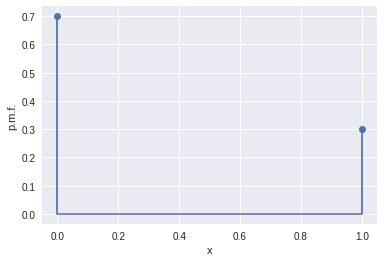

In [ ]:
p = 0.3

plt.stem([0, 1], [1 - p, p], use_line_collection=True)
plt.xlabel('x')
plt.ylabel('p.m.f.')
plt.show()

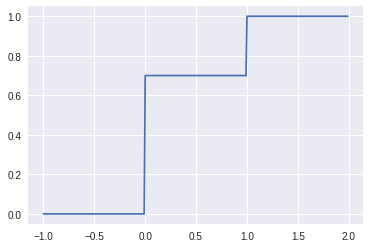

In [ ]:
x = np.arange(-1, 2, 0.01)

def F(x):
    return 0 if x < 0 else 1 if x > 1 else 1 - p

plt.plot(x, np.array([F(y) for y in x]))

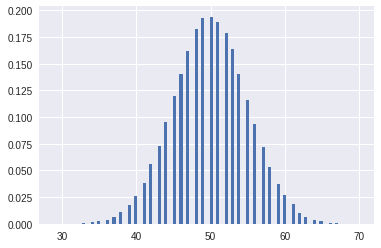

In [ ]:
x = 0.5

arr = [sum(np.array([(0 if np.random.uniform(0, 1)>x else 1) for i in range(100)])) for j in range(100000)]

# оцениваем вероятность получить тот или иной набор реализаций с помощью формы биномиального распределения
plt.hist(arr, bins=100, density=True)
plt.show()

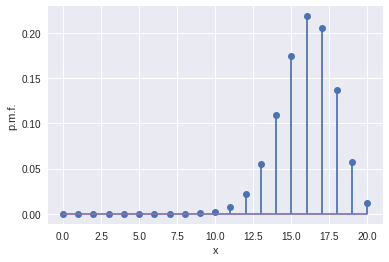

In [ ]:
n = 20
p = 0.8

def binomial(n, k):
    comb =1
    for i in range(min(k, n-k)):
        comb = comb*(n-i) // (i+1)
    return comb

pmf = np.array([p**i * (1-p)**(n-i) * binomial(n, i) for i in range(n+1)]  )

plt.stem([i for i in range(n + 1)], pmf, use_line_collection=True)
plt.xlabel('x')
plt.ylabel('p.m.f.')
plt.show()

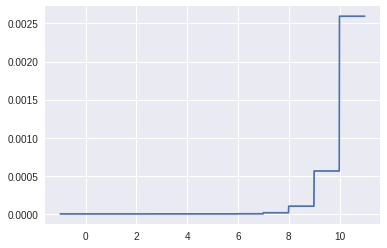

In [ ]:
pmf = np.cumsum(pmf)

x = np.arange(-1, 11, 0.01)

def F(x):
    return 0 if x < 0 else 1 if x>n else pmf[int(x)]

plt.plot(x, np.array([F(y) for y in x.tolist()]))

#### Распределение Пуассона.
- Получается из биномиального распределения, когда **n** делаем очень большим, а **p** очень маленьким.
- Распределение Пуассона моделирует случайную величину, представляющую собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга., например количество звонков, поступивших на телефонную станцию за один астрономический час.
- Случайная величина имеет распределение Пуассона с параметрами $\lambda > 0$, она принимает счетное множество значений, и вероятность того что случайна величина примет значение $k$ будет равно $\frac{\lambda^k}{k!}e^{-\lambda}$.  

Распределние Пуассона:

$$f(k ; \lambda)=\frac{\lambda^{k} e^{-\lambda}}{k !}$$

где:
- $\lambda$ - математическое ожидание случайной величины (среднее количество событий за фиксированный промежуток времени),
- $k!$ - обозначает факториал числа k
- $e = 2,7182...$ - основание натурального логарифма

In [ ]:
### Функция, на вход массив, на выход тоже массив
### ВАШ КОД ЗДЕСЬ
import math
def my_poisson(x, mu):
    pass

In [ ]:
# Так выглядит функция вероятности распределения Пуассона с параметром 2
mu = 2
plt.figure(figsize=(10, 6))
x = np.arange(10)
plt.vlines(x, #координтаты
           0, my_poisson(x, mu), # столбики идут от 0 до my_poisson(x, mu)
           colors='b', lw=5, alpha=0.5)

In [ ]:
from numpy import random

x = random.poisson(lam=2, size=10)

print(x)

[3 1 3 1 0 4 4 6 1 3]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


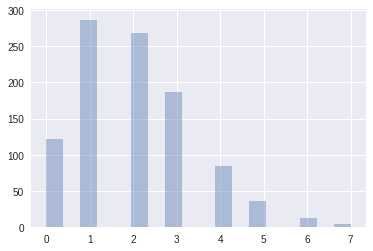

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.poisson(lam=2, size=1000), kde=False)

plt.show()

In [ ]:
#сгенерируем набор значений из распределения пуассона
s = np.random.poisson(5, 10000)

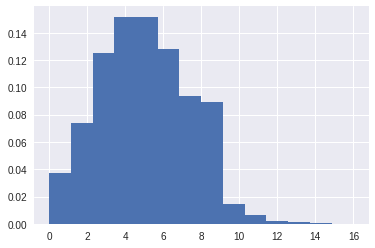

In [ ]:
#построим распределение
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

## Разница между Нормальным распределением и распределением Пуассона

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


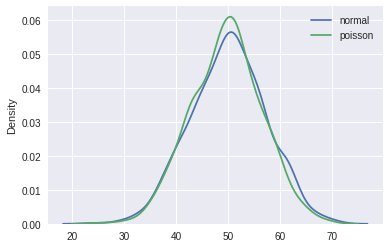

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')
sns.distplot(random.poisson(lam=50, size=1000), hist=False, label='poisson')
plt.legend()

plt.show()

## Разница между Биномиальным распределением и распределением Пуассона

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


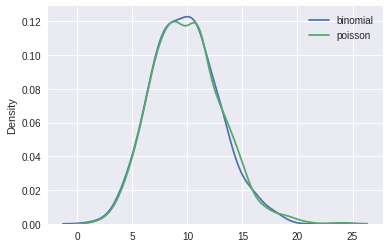

In [ ]:
sns.distplot(random.binomial(n=1000, p=0.01, size=1000), hist=False, label='binomial')
sns.distplot(random.poisson(lam=10, size=1000), hist=False, label='poisson')
plt.legend()

plt.show()


### Основных характеристиках, которые описывают распределения

Теперь поговорим об основных характеристиках, которые описывают распределения: мат.ожидание, медиана, дисперсия, перцентиль.
- Мат. ожидание - это число, характеризующее случайную величину, интерпретировать его можно по-разному, самый простой подход - среднее арифметическое элементов выборки.
- Медиа́на — это число, характеризующее случайную величину. Если все элементы выборки различны, то медиана — это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него. В более общем случае медиану можно найти, упорядочив элементы выборки по возрастанию или убыванию и взяв средний элемент. Например, выборка {11, 9, 3, 5, 5} после упорядочивания превращается в {3, 5, 5, 9, 11} и её медианой является число 5. Если в выборке чётное число элементов, медиана может быть не определена однозначно: для числовых данных чаще всего используют полусумму двух соседних значений (то есть медиану набора {1, 3, 5, 7} принимают равной 4). Если имеем распределение, то медиана - это такая точка, которая разделяет распределение на две равные части. Грубо говоря, медианой случайной величины является такое число, что вероятность получить значение случайной величины справа от него равна вероятности получить значение слева от него (и они обе равны 1/2).


В чем разница между медианой и средним значением?

Предположим, что в одной комнате оказалось 19 бедняков и один миллионер. У каждого бедняка есть 5, а у миллионера — 1 млн. В сумме получается 1 000 095. Если мы разделим деньги равными долями на 20 человек, то получим 50 004,75. Это будет среднее арифметическое значение суммы денег, которая была у всех 20 человек в этой комнате. Медиана в этом случае будет равна 5 (полусумма десятого и одиннадцатого, срединных значений ранжированного ряда). Можно интерпретировать это следующим образом. Разделив нашу компанию на две равные группы по 10 человек (предварительно отсортировав), мы можем утверждать, что в первой группе у каждого не больше 5, во второй же не меньше 5. В общем случае можно сказать, что медиана это то, сколько принёс с собой «средний» человек. Видно, среднее арифметическое — неподходящая характеристика, так как оно значительно превышает сумму наличных, имеющуюся у среднего человека.
Вопрос: о чем нам скажет разность мат.ожидания и медианы?

-Дисперсия - это мера разброса случайно величины относительно мат.ожидания, иными словами насколько чем дисперсия меньше чем случайная величина менее случайна, и наоборот.

**Задание:**
У какой случайной величины дисперсия будет равна нулю?


### Математическое ожидание
Пусть X — случайная величина, определённая на некотором вероятностном пространстве.

Чтобы суммировать ключевые характеристики вероятностных распределений, нам нужны некоторые меры. Математическое ожидание (или среднее значение) случайной величины X обозначается как

$$M[X] = E[X] = \sum_x xP(X=x)$$



Когда вход функции $f(x)$ является случайной величиной, полученной из распределения $P$ с различными значениями $x$, математическое ожидание $f(x)$ вычисляется как

$$E_{x~P}[f(x)] = \sum_xf(x)P(x)$$

означает среднее (взвешенное по вероятностям возможных значений) значение случайной величины. 

Во многих случаях мы хотим измерить, насколько случайная величина X отклоняется от своего математического ожидания. Это может быть количественно выражено дисперсией:

$$Var[X] = E[(X - E[X])^2] = E[X^2] - E[X]^2$$

**Доказательство:**
$$
\begin{aligned}
    E[(X - E[X])^2] &= E[X^2 - 2 X E[X] + (E[X])^2] =\\
    &= E[X^2] - 2 E[X] E[X]  + (E[X])^2 =\\
    &= E[X^2] - (E[X])^2
\end{aligned}
$$

Квадратный корень диспресии называется стандартным отклонением. Дисперсия функции случайной величины измеряется тем, насколько функция отклоняется от математического ожидания функции, поскольку из ее распределения выбираются различные значения x случайной величины:

$$Var[f(x)] = E[(f(x) - E[f(x)])^2$$

другое определение: 

- Дисперсией случайной величины называют математическое ожидание квадрата отклонения случайной величины от её математического ожидания.

- Среднеквадратическое отклонение - наиболее распространённый показатель рассеивания значений случайной величины относительно её математического ожидания. 


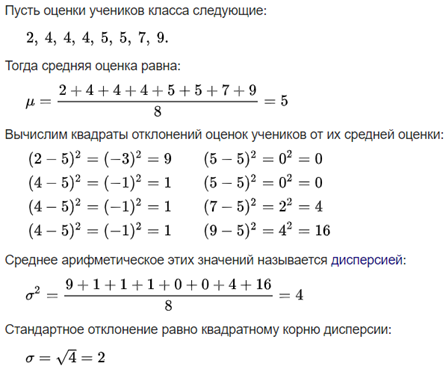

## Корреляция случайных величин

Корреля́ция (от лат. correlatio «соотношение, взаимосвязь») или корреляционная зависимость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин

### Коэффициент корреляции

Переменные в наборе данных могут быть связаны по многим причинам.

Например:

- Одна переменная может вызывать или зависеть от значений другой переменной.
- Одна переменная может быть легко связана с другой переменной.
- Две переменные могут зависеть от третьей неизвестной переменной.

Виды корреляции:

- **Положительное соотношение:** обе переменные изменяются в одном направлении.
- **Нейтральная корреляция:** Нет связи в изменении переменных.
- **Отрицательная корреляция:** переменные меняются в противоположных направлениях.

In [51]:
val1 = np.linspace(1, 100, 100)
val2 = 70*val1 - 22.5
data = pd.DataFrame({'val2': val2, 'val1':val1})
data.val1.corr(data.val2)

1.0

In [52]:
data

,val2,val1
0,47.5,1.0
1,117.5,2.0
2,187.5,3.0
3,257.5,4.0
4,327.5,5.0
...,...,...
95,6697.5,96.0
96,6767.5,97.0
97,6837.5,98.0
98,6907.5,99.0


По дефолту, pandas использует коэффициент корреляции пирсона при вызове df.corr(), коэффициент корреляции Пирсона между двумя переменными x, y находится по следующей формуле:

$$
r_{x y}=\frac{n \sum x_{i} y_{i}-\sum x_{i} \sum y_{i}}{\sqrt{n \sum x_{i}^{2}-\left(\sum x_{i}\right)^{2}} \sqrt{n \sum y_{i}^{2}-\left(\sum y_{i}\right)^{2}}}
$$

**Производительность** некоторых алгоритмов **может ухудшиться**, если **две или более переменных тесно связаны между собой**, что называется мультиколлинеарностью. Примером является линейная регрессия, где одна из нарушенных коррелированных переменных должна быть удалена, чтобы улучшить навыки модели.

Мы также можем быть заинтересованы в корреляции между входными переменными и выходной переменной, чтобы дать представление о том, какие переменные могут или не могут иметь значение в качестве входных данных для разработки модели.

In [36]:
data

,val2,val1
0,47.5,1.0
1,117.5,2.0
2,187.5,3.0
3,257.5,4.0
4,327.5,5.0
...,...,...
95,6697.5,96.0
96,6767.5,97.0
97,6837.5,98.0
98,6907.5,99.0


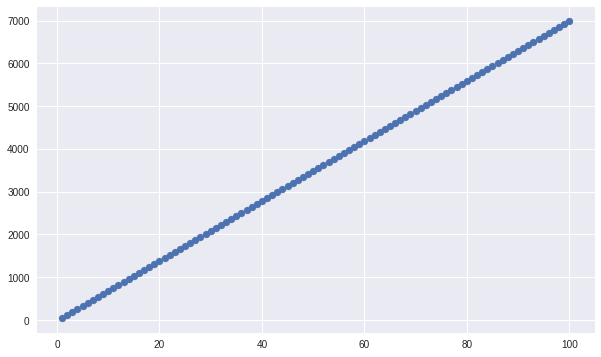

In [37]:
plt.figure(figsize = (10, 6))
plt.scatter(data.val1, data.val2)
plt.show()

Еще пример

In [53]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
xy = pd.DataFrame({'x-values': x, 'y-values': y})
x.corr(y)

0.7586402890911867

Построим матрицу корреляций

In [54]:
corr_matrix = xy.corr()
corr_matrix

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


Визуализируем при помощи библиотеки Seaborn

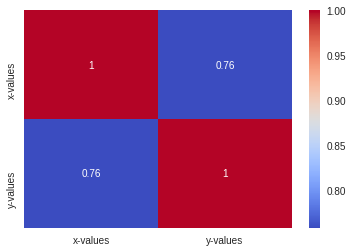

In [48]:
import seaborn as sns
sns.heatmap(corr_matrix, cmap= 'coolwarm', annot = True)
plt.show()

# Непрерывные случаные величины

Непрерывными они называются потому что могут принимать значения из пространства действительных чисел. Такие случайные величины определяются с помощью:

- функция распределения вероятности $F(x)$
- функций плотности распределения вероятности $p(x)$


Выше мы увидели основы работы с дискретными случайными переменными, которые в нашем случае относятся к тем случайным переменным, которые принимают либо конечный набор возможных значений, либо целые числа. Далее мы развиваем теорию непрерывных случайных величин. Справедливая аналогия заключается в том, что технический переход сопоставим с переходом между суммами и интегрированием функций.

Первый способ определения непрерывных величин — с помощью функции распределения:

$$
F(x)=P(X \leqslant x)
$$


<center><img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/img/nepr_raspred.png?raw=true" width=350 /><center>


Функция распределения всегда принимает значение от 0 до 1 и не убывает по аргументу x.

Второй способ определения непрерывных случайных величин — с помощью плотности распределения:


Плотность распределения — это производная от функции распределения непрерывной случайной величины:
$$f(x)=F^{\prime}(x)$$

Вероятность того, что непрерывная случайная величина примет значение от a до b равна интегралу от a до b плотности распределения случайной величины:

$$
f(x): \int_{a}^{b} f(x) d x=P(a \leqslant X \leqslant b)
$$

Плотность связана с функцией распределения следующим образом:

$$
F(x)=\int_{-\infty}^{x} f(u) d u
$$


Для непрерывной случайной величины верно равенство:


$$
\int_{-\infty}^{+\infty} f(u) d u=P(-\infty \leqslant X \leqslant+\infty)=1
$$

Примером непрерывной случайной величины является **равномерная случайная
величина**. Пусть X — это время ожидания на светофоре до того, как можно будет
перейти дорогу. Если на светофоре нет счетчика, то нельзя угадать, сколько именно
придется ждать зеленого сигнала. Время ожидания может быть любым числом от 0

до, например, 30 секунд. Именно так устроено равномерное распределение — случайная величина на отрезке $[a, b]$ принимает любое значение с одинаковой вероятностью:

$$
X \sim U(a, b)
$$

<center><img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/img/ravnom_raspred.png?raw=true" width=300 /><center>

Плотность вероятности для равномерной случайной величины имеет вид:
$$
f(x)=\left\{\begin{array}{ll}
\frac{1}{b-a}, & x \in[a, b] \\
0, & x \notin[a, b]
\end{array}\right.
$$

<center><img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/img/ravnom_plotn.png?raw=true" width=450 /><center>

### Подробнее о функции плотности вероятностей

Плотность распределения вероятностей непрерывной случайной величины нужна для того, чтобы показать изменение вероятности на каком-то конкретном элементе множества. Плотность распределения — это производная от функции распределения непрерывной случайной величины:
$$f(x)=F^{\prime}(x)$$

У дискретных (принимающих конечное или счетное число значений) величин плотности нет.

Вероятность того, что непрерывная случайная величина примет значение от a до b равна интегралу от a до b плотности распределения случайной величины:

$$P(a \leq X \leq b)=\int_{a}^{b} f(x) d x$$

А вот так это можно показать геометрически. Допустим, есть некая плотность распределения случайной величины:


<center><img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/img/density.png?raw=true" width=700 /><center>

Вероятность того, что X примет значение от a до b, равна площади фигуры под кривой в диапазоне как раз от a до b (на графике эта площадь показана серым).


Для примера, можно поглядеть на плотность вероятности функции экспоненциального распределения. Формула самой функции выглядит так:

$$F(x)=\left\{\begin{array}{ll}1-e^{-\lambda x} & , x \geq 0 \\ 0 & , x<0\end{array}\right.$$

график функции распределения при 𝛌=0.5:

<center><img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/img/rapred.png?raw=true" width=650 /><center>

А вот так выглядит формула плотности распределения:

$$f(x)=\left\{\begin{array}{ll}\lambda e^{-\lambda x} & , x \geq 0 \\ 0 & , x<0\end{array}\right.$$

и ее график при 𝛌=0.5:

<center><img src="https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/img/rapred_2.png?raw=true" width=750 /><center>

серым цветом на графике для примера показана вероятность того, что при 𝛌=0.5 X примет значение от 1 до 2, которую можно посчитать как:

$$
P(1 \leq X \leq 2)=\int_{1}^{2} \lambda e^{-\lambda x} d x \approx 0.239
$$

Пример: 

Найти вероятность падения в синюю область.

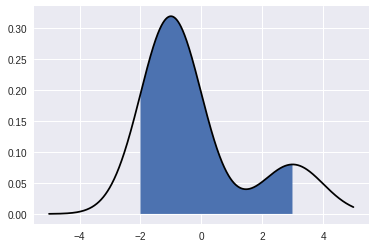

('Вероятность:', 0.7736171925899021)

In [50]:
epsilon = 0.01
x = np.arange(-5, 5, 0.01)
p = 0.2*np.exp(-(x - 3)**2 / 2) / np.sqrt(2 * np.pi) + \
    0.8*np.exp(-(x + 1)**2 / 2) / np.sqrt(2 * np.pi)

plt.plot(x, p, color='black')
plt.fill_between(x.tolist()[300:800], p.tolist()[300:800])
plt.show()

'Вероятность:', np.sum(epsilon*p[300:800])

### Рассмотрим наиболее часто встречающиеся семейства непрерывных распределений

Непрерывными они называются потому что могут принимать значения из пространства действительных чисел. Такие случайные величины определяются с помощью:
- функций плотности распределения вероятности $p(x)$
- функция распределения вероятности $F(x)$

#### Равномерное распределение.
Непрерывная величина распределена равномерно на интервале (a, b), если все ее возможные значения находятся на этом интервале и плотность распределения вероятностей постоянна. Пример: мы пришли на остановку автобуса, который ходит с 10-минутными интервалами, тогда какова вероятность того, что автобус придет в течении первой минуты, второй минуты и т.д. Очевидно что 1/10.

#### Показательное распределение. 
Непрерывная случайная величина  Х  имеет показательное распределение, если плотность распределения ее вероятностей выражается формулой: $p(x) = \lambda e^{-\lambda x}$ для $x > 0$. Показательное распределение может описывать вероятность отказа какого-то прибора с течением времени.

#### Нормальное (гауссово) распределение.
- Непрерывная случайная величина  Х  имеет нормальное распределение с параметрами $\mu$ и $\sigma$, если плотность распределения ее вероятностей выражается формулой: $p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$. 
- в сигма 68%, в 2 сигма 95%, в 3 сигма 99%
- ПШПВ (полная ширина пика на половине его высоты) = 2,35 сигма
- Примеров этого распределения просто тьма: рост, вес людей, время жизни описывается нормальным распределением. 
- нормальному распределению подчиняются большое количество случайный величин, среди них: вес полуфабриката, длина изделия, время производственного цикла, время обработки, количество дефектов по дням и т.д. Случаи когда перечисленные величины не распределены по нормальному закону могут возникать, но довольно редко.

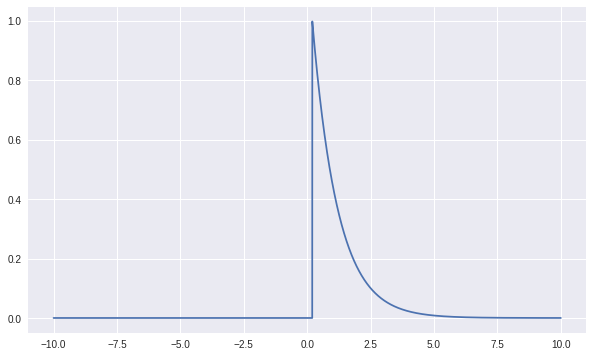

In [ ]:
# это функция плотности распределения вероятности для экспоненциального распределения с параметрами lambda = 0.2
x = np.linspace(-10, 10, 5000)
lam = 0.2


y = stats.expon.pdf(x, lam)

plt.figure(figsize = (10, 6))
plt.plot(x, y)
plt.show()

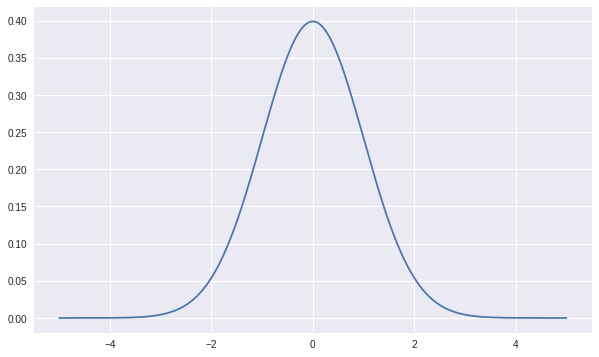

In [ ]:
# это функция плотности распределения вероятности для нормального распределения с параметрами mu = 0 и sigma = 1
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize = (10, 6))
plt.plot(x, y)
plt.show()

Отобразим плотность распределения вероятности и функция распределения вероятности на одном графике

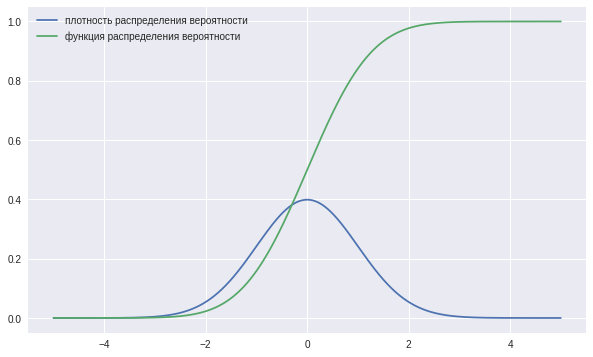

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1
y_pdf = stats.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = stats.norm.cdf(x, mu, sigma) # the normal cdf

plt.figure(figsize = (10, 6))
plt.plot(x, y_pdf, label='плотность распределения вероятности')
plt.plot(x, y_cdf, label='функция распределения вероятности')
plt.legend()
plt.show()

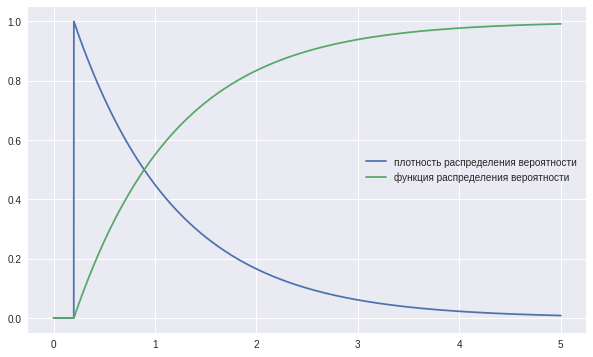

In [ ]:
x = np.linspace(0, 5, 5000)
mu = 0.2

y_pdf = stats.expon.pdf(x, mu)
y_cdf = stats.expon.cdf(x, mu)

plt.figure(figsize = (10, 6))
plt.plot(x, y_pdf, label='плотность распределения вероятности')
plt.plot(x, y_cdf, label='функция распределения вероятности')
plt.legend()
plt.show()

Функция распределения вероятности является монотонной и принимает значения из отрезка $(0, 1)$. Можем условно считать что значения функции распределения имеют следующие значения на бесконечности: $F(-\infty) = 0$, $F(+\infty) = 1$.    
Напрашивается вопрос: как же искать вероятность для таких распределений ответ достаточно простой: вероятность того что случайная величина примет значение внутри интервала равно разности значений функции распределения на концах выбранного интервала. Поясним на примере.

In [ ]:
mu = 170
sigma = 10
print('пусть рост мужчины имеет нормальное распределение с параметрами mu = 170 и sigma = 10')
print('тогда найдем вероятность того, что случайно выбранный мужчина окажется ниже 150: {0:.3f}'.format( 
      stats.norm.cdf(150, mu, sigma)))
print('тогда найдем вероятность того, что рост случайно выбранного мужчины окажется выше 150 и ниже 180: {0:.3f}'.format(
    stats.norm.cdf(180, mu, sigma) - stats.norm.cdf(150, mu, sigma)))

пусть рост мужчины имеет нормальное распределение с параметрами mu = 170 и sigma = 10
тогда найдем вероятность того, что случайно выбранный мужчина окажется ниже 150: 0.023
тогда найдем вероятность того, что рост случайно выбранного мужчины окажется выше 150 и ниже 180: 0.819


In [ ]:
### найдите вероятность того, мужчина выше 180
### ВАШ КОД ЗДЕСЬ

In [ ]:
### еще задачка: срок работы лампочки имеет экспоненциальное распределение с параметром лямбда 0.001
### какова вероятность того что проработает не меньше 2 лет?
### ВАШ КОД ЗДЕСЬ

## Гистограммы
- Оказывается, что мы не всегда знаем, закон распределения какой-то случайно величины, чаще всего в жизни мы имеем дело с выборками (то есть случайными подмножествами элементов) из распределения. 
- И если выборка достаточно большая то она будет достаточно описывать закон распределения, а значит параметры распределения можно довольно точно оценить по выборке.
- Один из способов исследования распределений по выборкам это гистограммы. Строить гистограммы довольно просто, вся область значений случайной величины разделяется на отрезки и для каждого отрезка рассчитывается количество точек, попавших в этот отрезок.

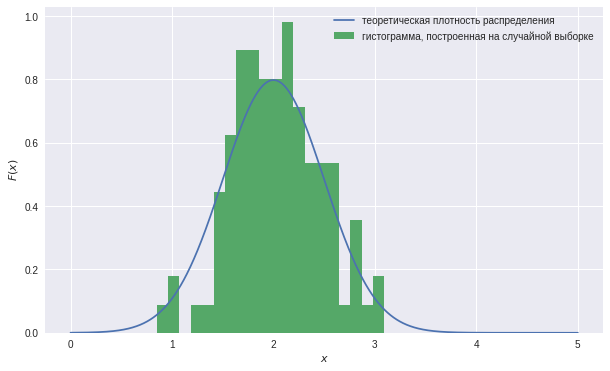

Теоретическое мат.ожидание  2.0
Оценка мат.ожидания по выборке  2.03029142603785
Теоретическая медиана  2.0
Оценка медианы по выборке  2.0320369557811473
Теоретическая дисперсия  0.25
Оценка мат.ожидания по выборке  0.19587538072116667


In [ ]:
np.random.seed(1)       # если мы хотим воспроизводимости результатов, то фиксируем этот параметр
rv = stats.norm(2, 0.5) # создаем объект - распределение
viborka = rv.rvs(100)   # генерируем 100 элементов из этого распределения
 
x = np.linspace(0, 5, 1000)
pdf = rv.pdf(x)         # плотность распределения

plt.figure(figsize = (10, 6))
# рисуем теоретическую плотность распределения
plt.plot(x, pdf, label='теоретическая плотность распределения')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
 
# рисуем гистограмму
plt.hist(viborka, bins=20, label='гистограмма, построенная на случайной выборке', density = True)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

plt.legend()
plt.show()
print('Теоретическое мат.ожидание ',rv.mean())
print('Оценка мат.ожидания по выборке ',viborka.mean())
print('Теоретическая медиана ',rv.median())
print('Оценка медианы по выборке ',np.median(viborka))
print('Теоретическая дисперсия ',rv.std() ** 2)
print('Оценка мат.ожидания по выборке ',viborka.std() ** 2)

In [ ]:
a = sorted(viborka)
step = (a[-1] - a[0])/19

In [ ]:
data = pd.DataFrame(a, columns=['value'])
data['bin'] = np.nan
for idx in range(len(a)):
    data['bin'] = np.where((a[0] + idx*step <= data.value)&(data.value < a[0]+(idx+1)*step), idx, data['bin'])

(0.0, 5.0)

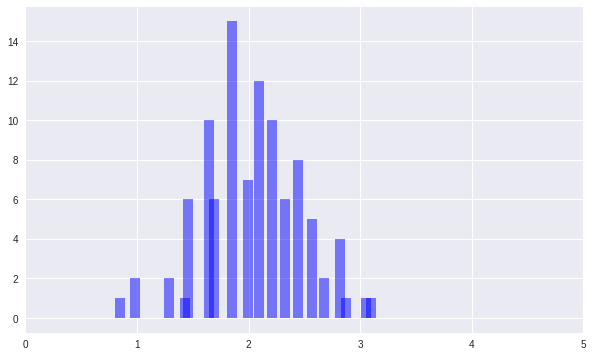

In [ ]:
plt.figure(figsize = (10, 6))
plt.vlines(data.groupby('bin')['value'].median().values, #координтаты
           0, data['bin'].value_counts().sort_index().values, # столбики идут от 0 до stats.poisson.pmf(x, mu)
           colors='b', lw=10, alpha=0.5)
plt.xlim([0,5])

## Рекомендуемая литература

- Начала теорвера: https://drive.google.com/file/d/1bc1g50uDFTYX7ExSlHs75blMbEwwmGEI/view
